In [ ]:
# Reading the dataset in
import pandas as pd
from google.colab import files
uploaded = files.upload()

Saving HR_comma_sep.csv to HR_comma_sep.csv


In [ ]:
data = pd.read_csv('HR_comma_sep.csv', sep=',')

In [ ]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
data.drop('sales', axis =1, inplace=True)

In [ ]:
# Label enconder

from sklearn.preprocessing import LabelEncoder as Lb

encoder = Lb() #create an object of the Label Encoder class



In [ ]:
data['salary'] = encoder.fit_transform(data['salary'])

In [ ]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary
0,0.38,0.53,2,157,3,0,1,0,1
1,0.80,0.86,5,262,6,0,1,0,2
2,0.11,0.88,7,272,4,0,1,0,2
3,0.72,0.87,5,223,5,0,1,0,1
4,0.37,0.52,2,159,3,0,1,0,1


In [ ]:
# from scipy.stats import pearsonr

# # Compute the correlation coefficient and p-value
# p = pearsonr

# # Deduce the value of the correlation coefficient
# if r > 0:
#   print("The variables are positively correlated.")
# elif r < 0:
#   print("The variables are negatively correlated.")
# else:
#   print("The variables are not correlated.")


In [ ]:
# Calculate the correlation coefficient
correlation = data["average_montly_hours"].corr(data["salary"])
print("The correlation coefficient is:", correlation)

# Determine the type of relationship
if correlation > 0:
    print("Positive relationship")
elif correlation < 0:
    print("Negative relationship")
else:
    print("No relationship")

The correlation coefficient is: 0.0070819603894664305
Positive relationship


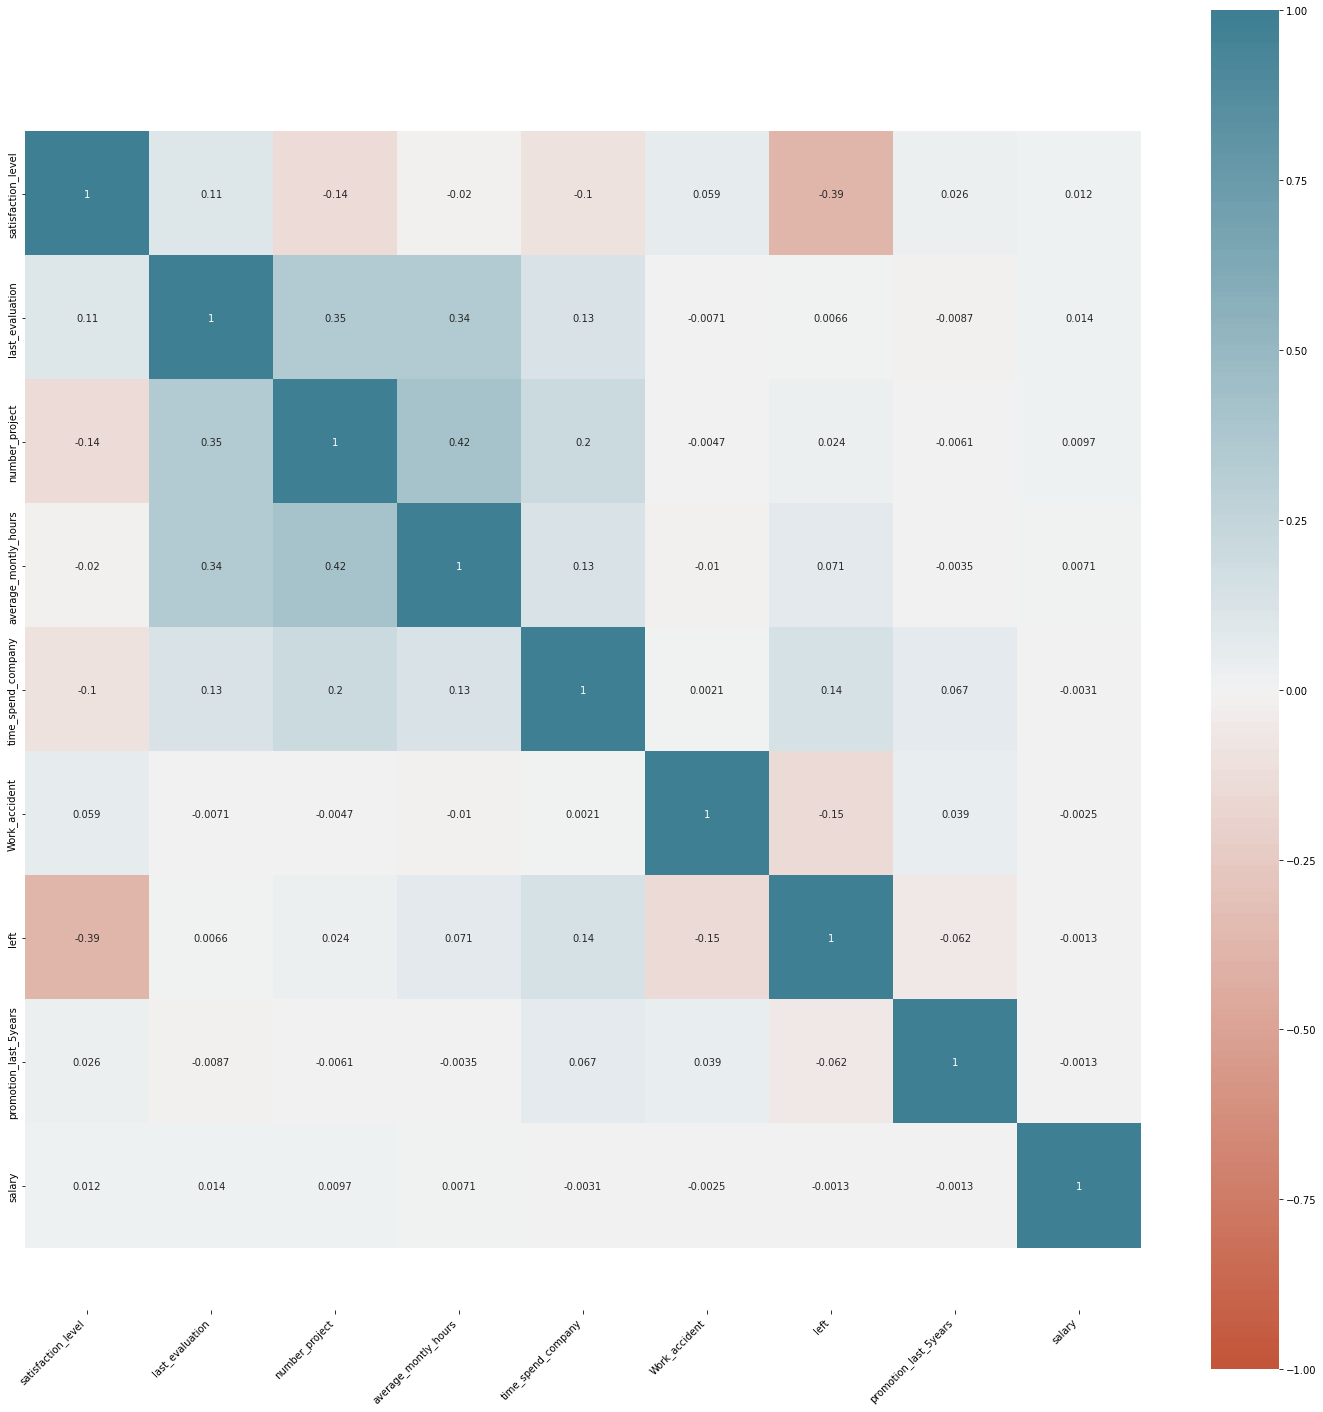

In [ ]:
# Correlation of the features
import seaborn as sns
import matplotlib.pyplot as plt

corr = data.corr()

plt.figure(figsize=(25, 25))
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

In [ ]:
import statsmodels.api as sm

y = data['average_montly_hours'] #response variable or target variable
x = data[['number_project']] # explanatory variable or independent
c = sm.add_constant(x)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
c

,const,number_project
0,1.0,2
1,1.0,5
2,1.0,7
3,1.0,5
4,1.0,2
...,...,...
14994,1.0,2
14995,1.0,2
14996,1.0,2
14997,1.0,6
